In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [45]:
def gen_spin_operators(L):
    """Returns the spin-1/2 operators sigma_x and sigma_z for L sites."""
    X = sparse.csr_array(np.array([[0.,1.],[1.,0.]]))
    Z = sparse.csr_array(np.diag([1.,-1.]))
    
    d = 2
    Sx_list = []
    Sz_list = []
    
    for i_site in range(L):
        # ops on first site
        if i_site == 0: 
            Sx = X
            Sz = Z 
        else: 
            Sx = sparse.csr_array(np.eye(d))
            Sz = sparse.csr_array(np.eye(d))
        # ops on remaining sites
        for j_site in range(1, L):
            if j_site == i_site: 
                Sx = sparse.kron(Sx, X, 'csr')
                Sz = sparse.kron(Sz, Z, 'csr')
            else:
                Sx = sparse.kron(Sx, np.eye(d), 'csr')
                Sz = sparse.kron(Sz, np.eye(d), 'csr')
        Sx_list.append(Sx)
        Sz_list.append(Sz)
    
    return Sx_list, Sz_list

def gen_hamiltonian_terms(L, Sx_list, Sz_list):
    """Generates the XX and Z terms of the Hamiltonian."""
    D = Sx_list[0].shape[0]
    print(f'System with {L:d} sites, Hilbert space dimension is {D:d}.')

    # Ising interaction
    Hxx = Sx_list[0] @ Sx_list[1]
    for i in range(1, L-1):
        Hxx += Sx_list[i] @ Sx_list[i+1]
    
    # onsite field terms
    Hz = Sz_list[0]
    for Sz in Sz_list[1:L]:
        Hz += Sz
    
    return Hxx, Hz

In [46]:
# define Hamiltonian terms
L = 11
J = 1.
g = 2.    


Sx_list, Sz_list = gen_spin_operators(L)
Hxx, Hz = gen_hamiltonian_terms(L, Sx_list, Sz_list)

H = -J * Hxx -g * Hz

System with 11 sites, Hilbert space dimension is 2048.


In [47]:
# compute correlator
dt = 1e-2
n = 10
N = 2**n

# get ground state
E, psi = eigsh(H, k=1, which='SA')
E0, psi = np.squeeze(E), np.squeeze(psi)
print('Ground state energy:', E0)

# put in excitation
psi = Sx_list[L//2] @ psi
E1 = np.dot(psi.conj(), H @ psi).real
print('Excited state energy:', E1)

# evolve states in time
psis = expm_multiply(-1j * H,
                     psi,
                     start=0,
                     stop=N*dt,
                     num=N,
                     endpoint=False)

# calculate correlators C = <psi| e^iHt X_ell e^-iHt X_L/2 |psi>
Cs = np.einsum('j, ij -> i', psi.conj(), psis) * np.exp(1j * E0 * np.arange(N) * dt)

Ground state energy: -23.26640793492969
Excited state energy: -19.529530591449635


In [48]:
print(Cs.shape)

(1024,)


In [94]:
import sys
sys.path.append("/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")
print(sys.path)

import os
print(os.getcwd())

import TCI_singlesite as TCI
import importlib

importlib.reload(TCI)

['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.12/dist-packages', '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI', '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI', '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI', '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI', '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI', '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI', '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI', '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI', '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI', '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI', '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI', '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI', '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI', '

<module 'TCI_singlesite' from '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI/TCI_singlesite.py'>

### TCI for Cs.imag, Cs.real and Cs.abs separately
Here we build correlation function with TCI, and check after how many function evaluations we obtain the correct function

['Cs_abs', 'Cs_re', 'Cs_im']
[1.         0.99989822 0.99959292 ... 0.29432308 0.29057801 0.28691534]
[ 1.          0.99920017  0.99680264 ... -0.28616225 -0.28139736
 -0.27671569]
[ 0.         -0.03735605 -0.07463581 ...  0.06882763  0.07246454
  0.0758211 ]
final err_max:  1.127471822445151e-14
final err_2:  3.836517675994458e-15

repeated evaluations:  13601
unique evaluations 1024
unique + repeated:  14625
total evaluations:  14625
final err_max:  7.593924537318691e-15
final err_2:  4.301823083437363e-15

repeated evaluations:  13601
unique evaluations 1024
unique + repeated:  14625
total evaluations:  14625
final err_max:  7.314125903541684e-15
final err_2:  4.8323170508175275e-15

repeated evaluations:  13601
unique evaluations 1024
unique + repeated:  14625
total evaluations:  14625


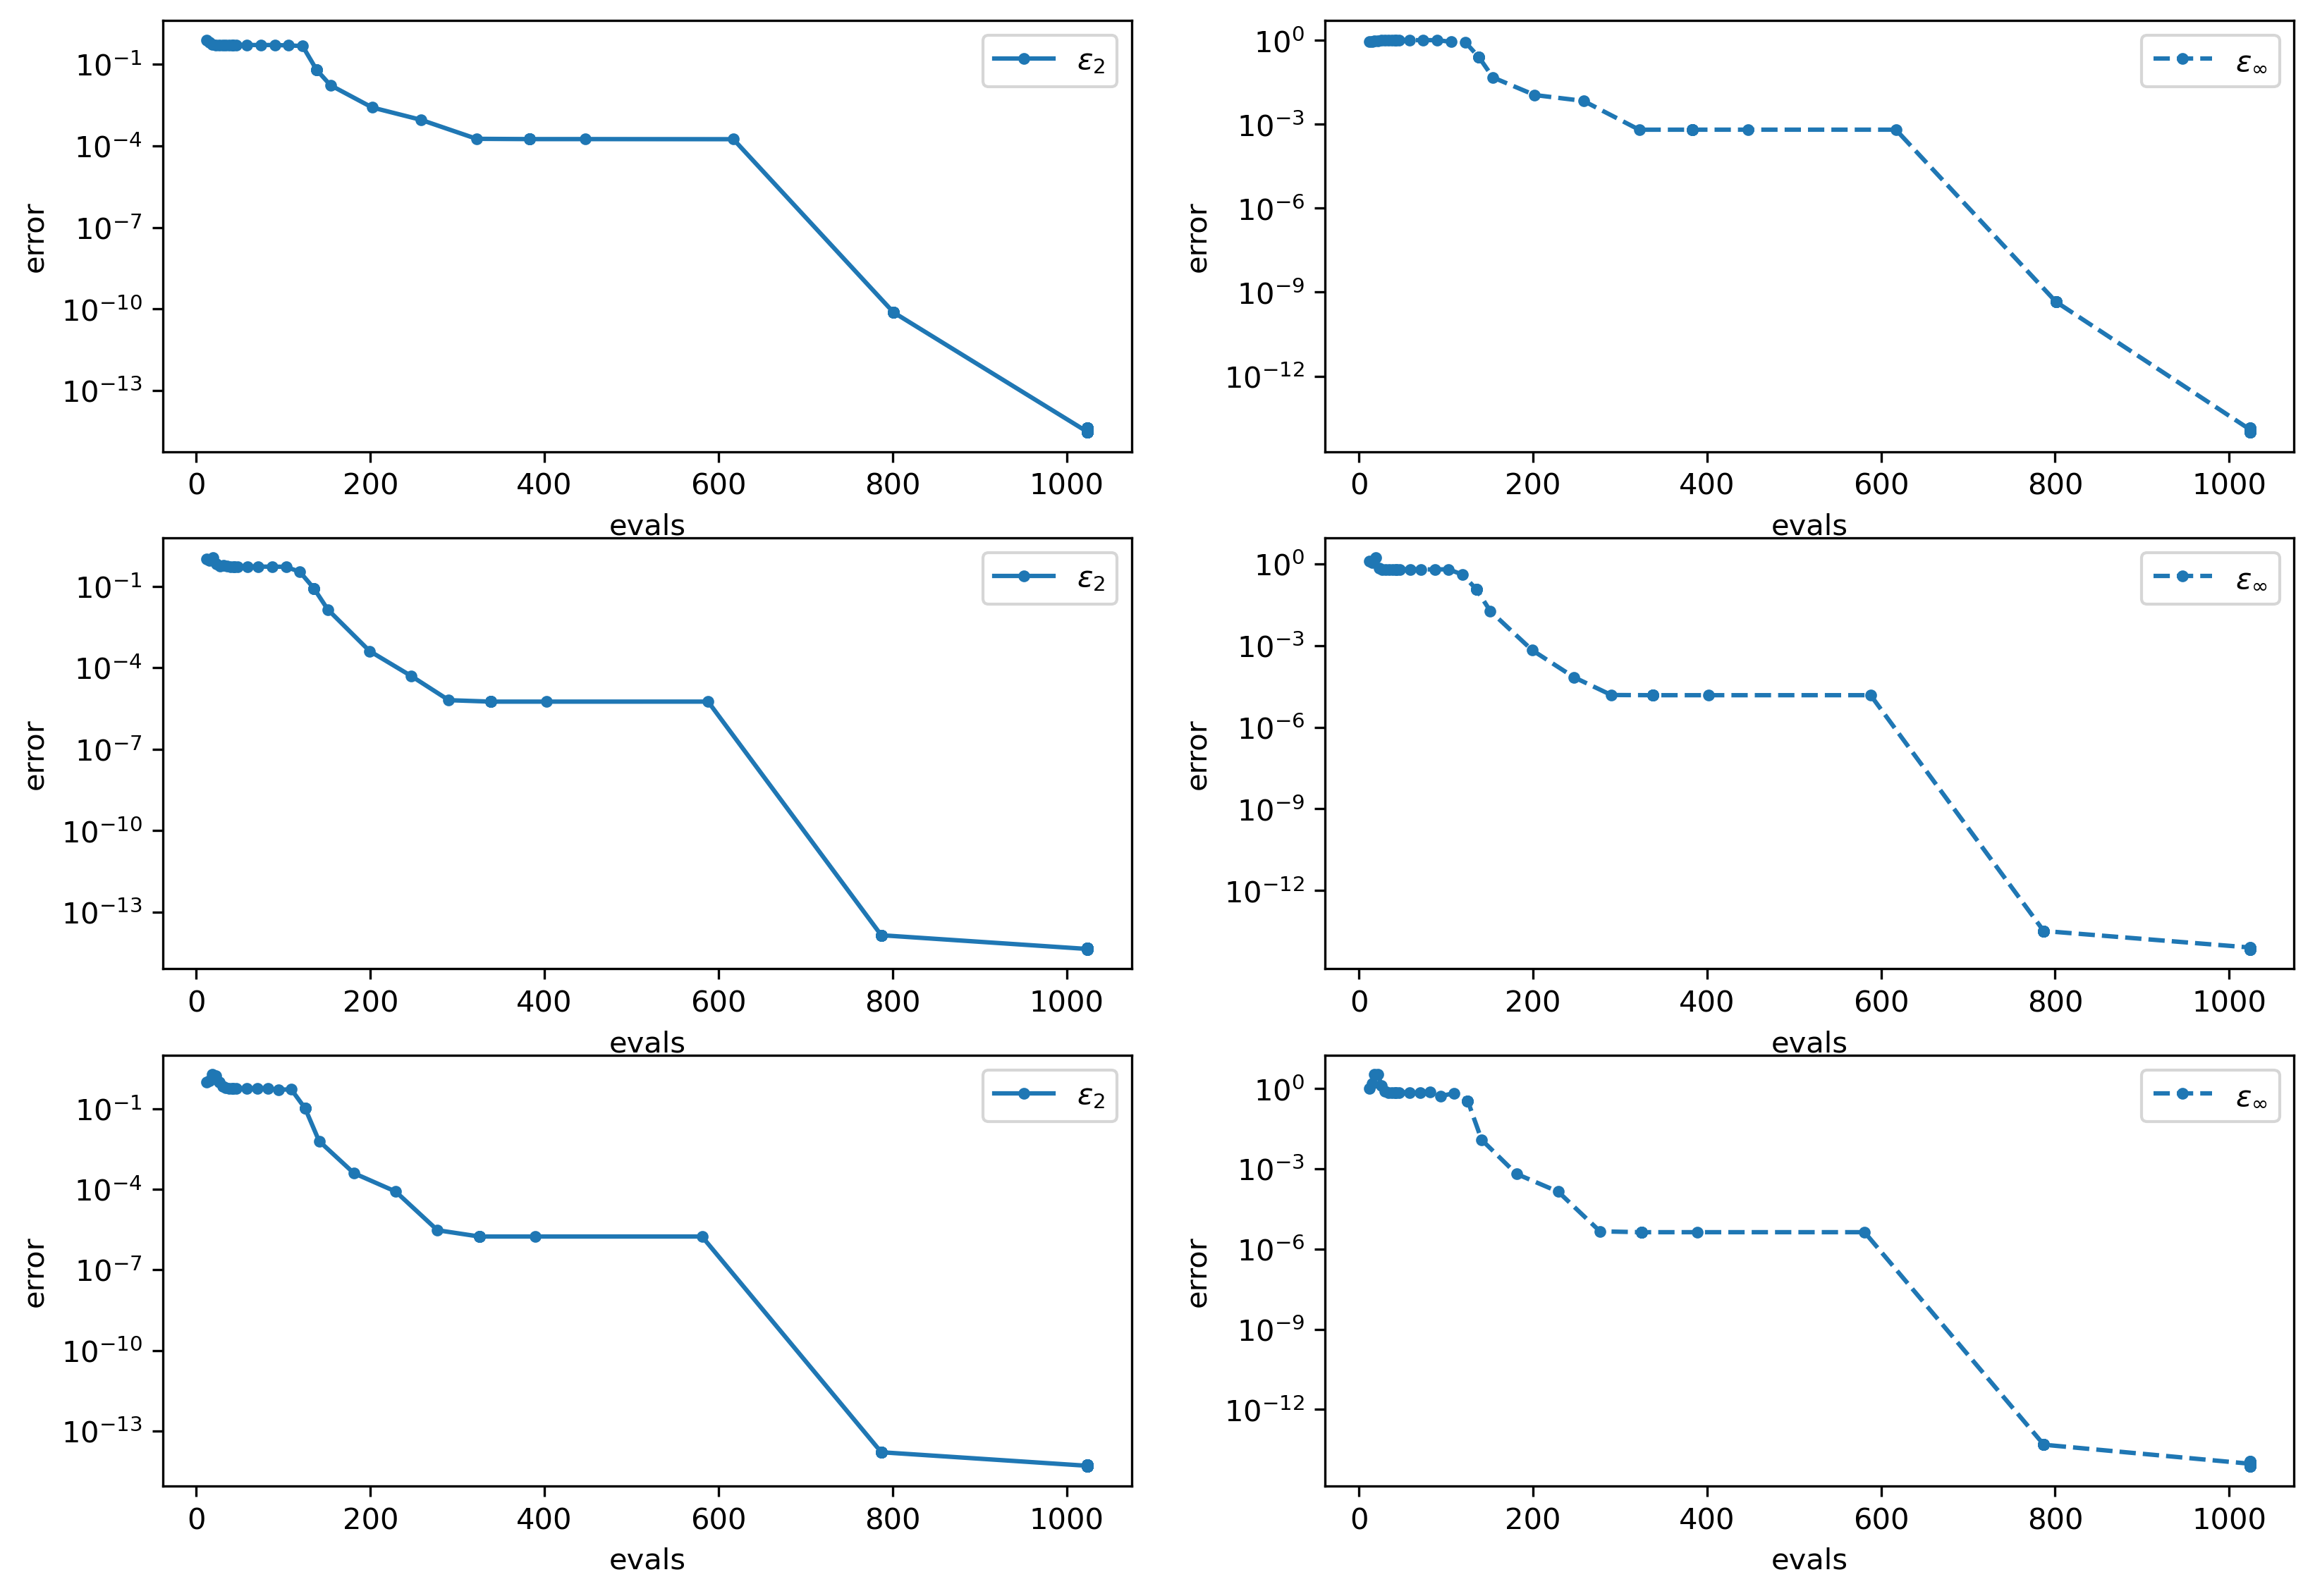

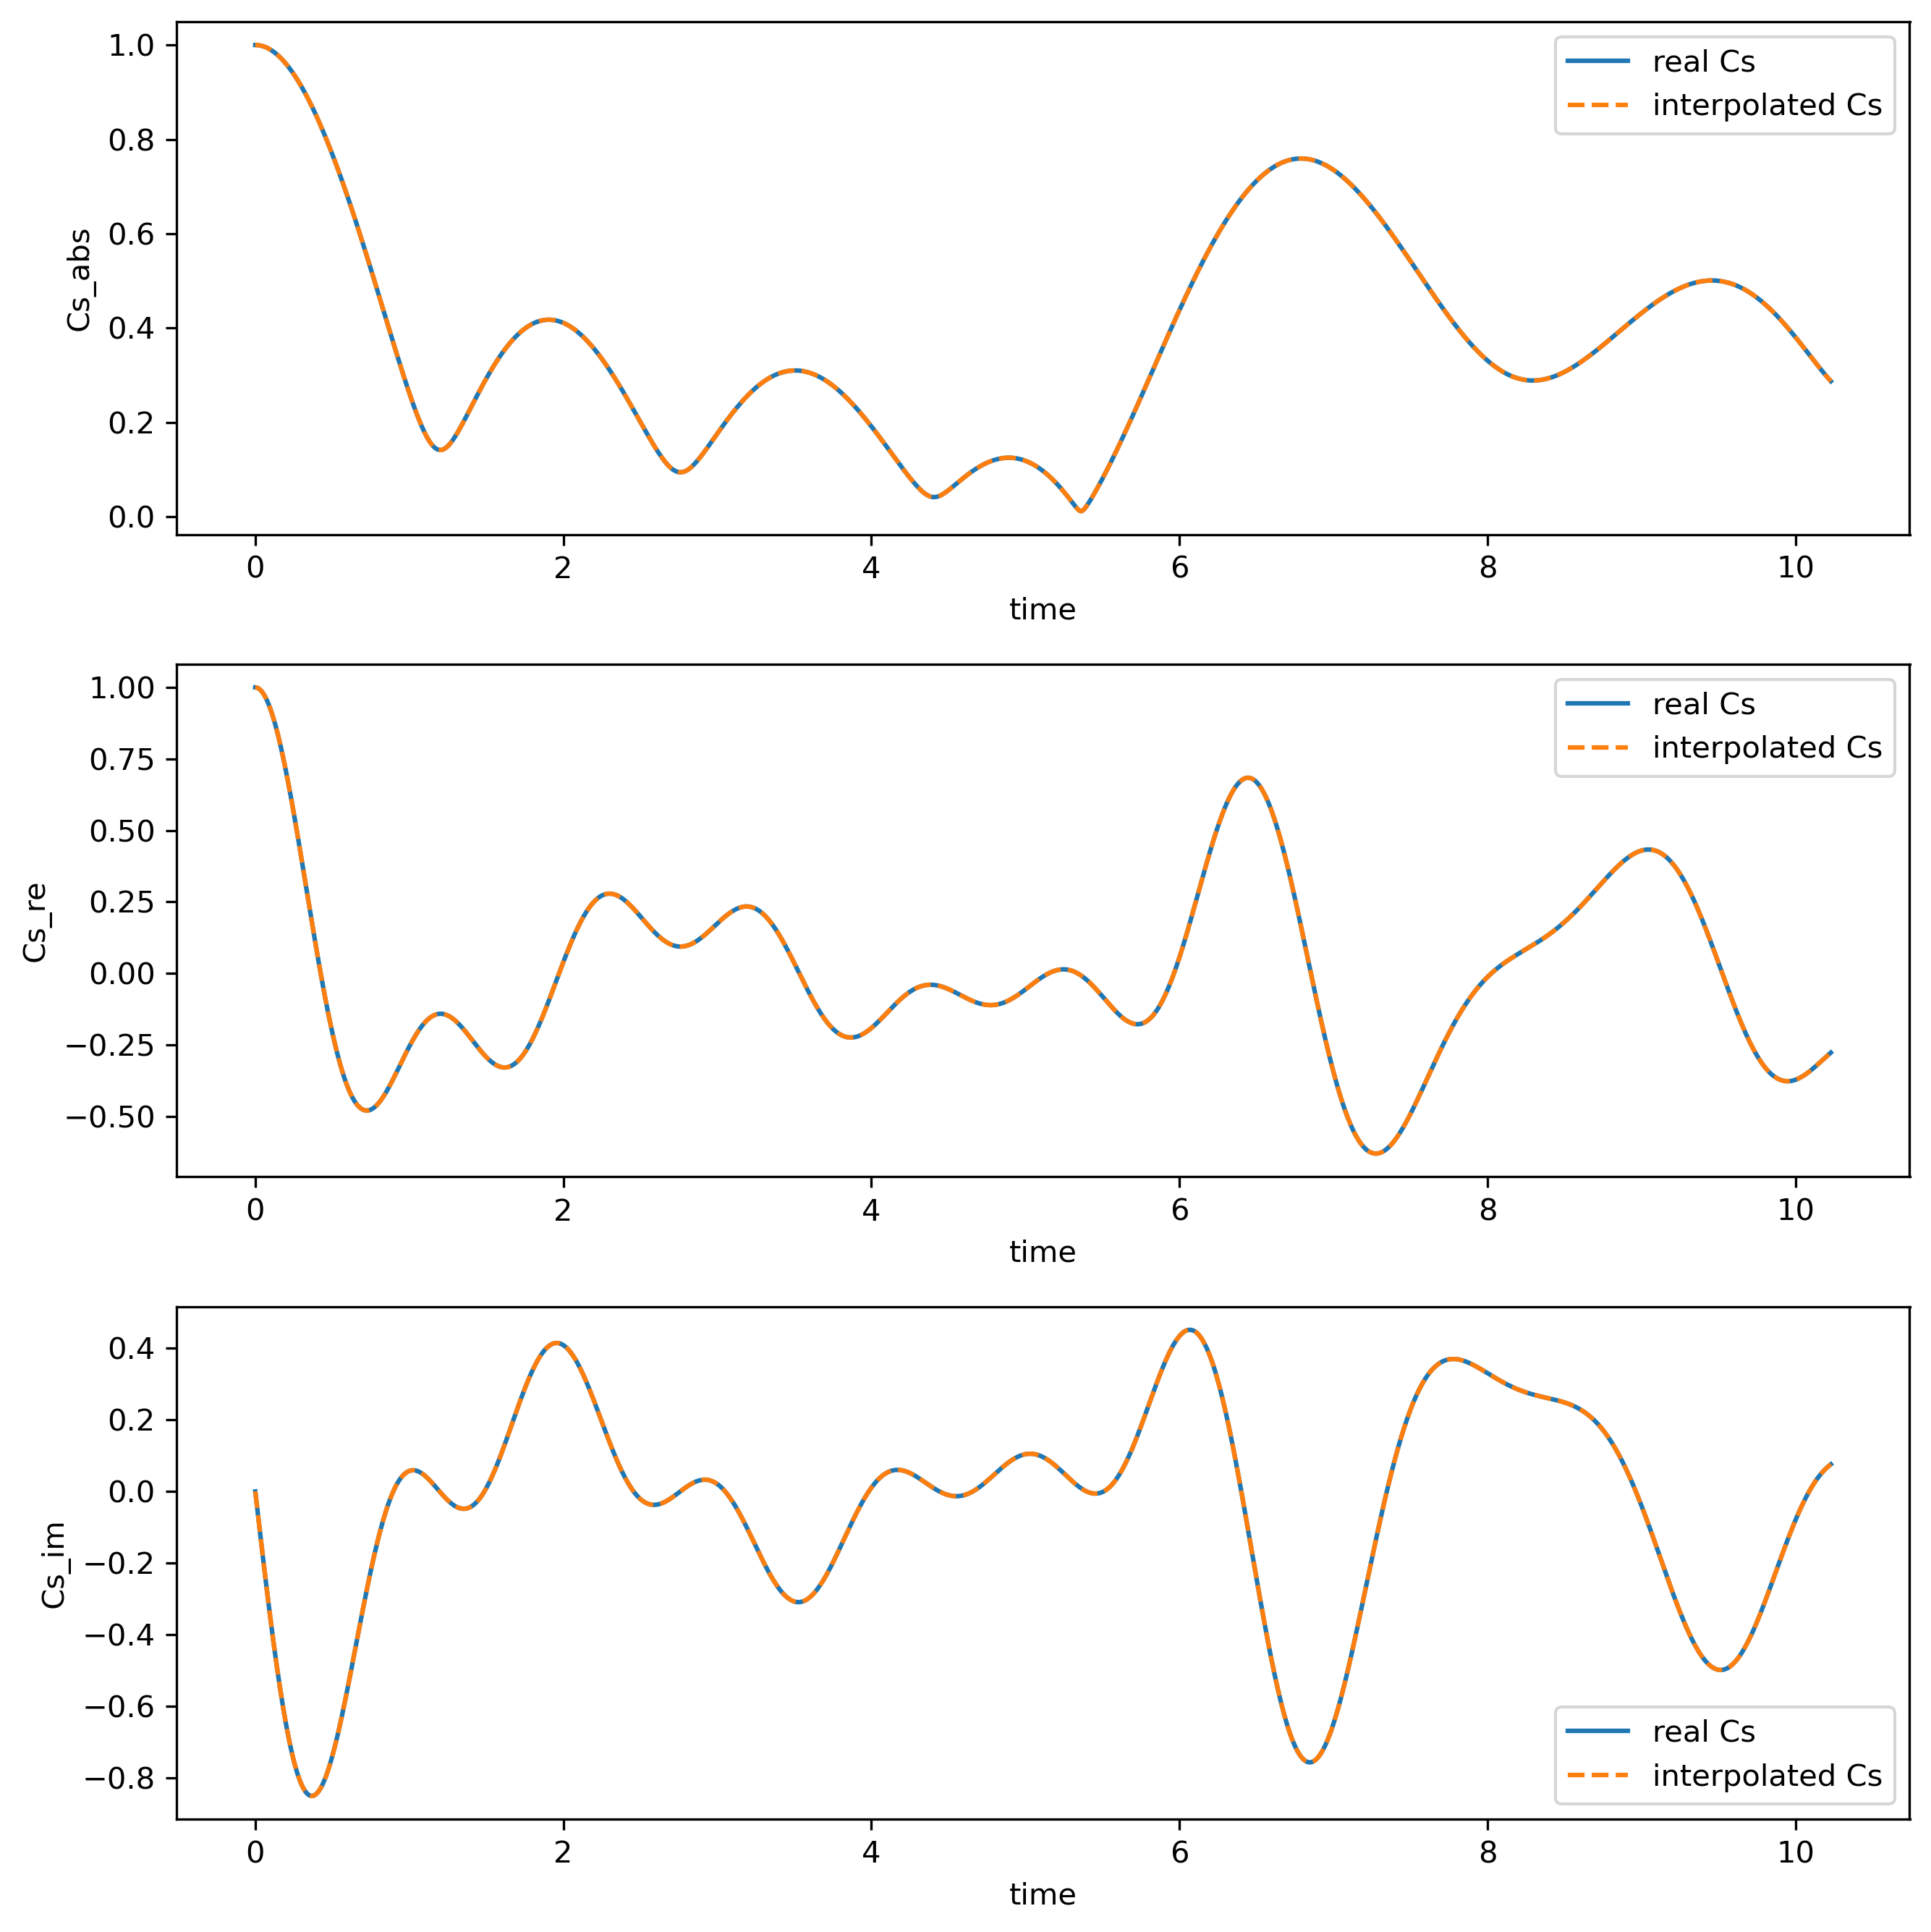

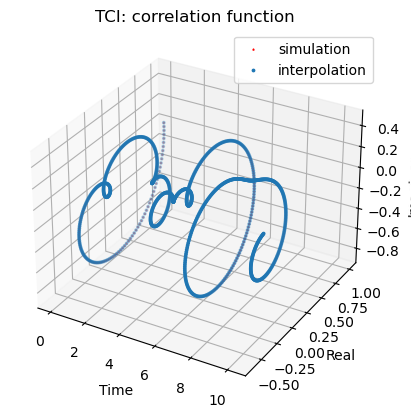

In [95]:
#print(type(Cs))
C = {}

C["Cs_abs"] = np.abs(Cs)
C["Cs_re"] = Cs.real
C["Cs_im"] = Cs.imag
key = []
for i in C:
    key.append(i)

print(key)
for i in range(3):
    print(C[key[i]])

fig1, axs1 = plt.subplots(nrows=3, ncols=2, figsize=(13,9), dpi=300)
fig2, axs2 = plt.subplots(nrows=3, figsize=(9,9), dpi=300)

func_plot = []

for i in range(3):
    func = TCI.function(lambda *x: C[key[i]].reshape((2,) * n)[*x])

    As, _, eval, err_2, err_max = TCI.tensor_cross_interpolation(func,         # function to be interpolated
                                    C[key[i]],      
                                    L=n,          # number of MPS tensors
                                    eps_or_chi=20, # bond dimension
                                    iters=4)       # number of back-and-forth sweeps


    axs1[i,0].plot(eval, np.array(err_2), '.-', label = r"$\epsilon_2$")
    axs1[i,1].plot(eval, err_max, '.--', label = r"$\epsilon_\infty$")
    axs1[i,0].set(xlabel="evals",ylabel="error",
            #xscale="log",
            yscale="log",
            #ylim=(1e-5, 1e0)
            )
    axs1[i,1].set(xlabel="evals",
            ylabel="error",
            #xscale="log",
            yscale="log",
            #ylim=(1e-2,1e2)
            )
    axs1[i,0].legend()
    axs1[i,1].legend()

    #plt.tight_layout()

    func_interp = TCI.interpolate(As)

    func_plot.append(func_interp) 

    axs2[i].plot(np.arange(N)*dt, C[key[i]], '-', label = "real Cs")
    axs2[i].plot(np.arange(N)*dt, func_interp, '--', label="interpolated Cs")
    axs2[i].set(xlabel="time", ylabel=key[i])
    axs2[i].legend()
plt.tight_layout()
plt.show()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.arange(N)*dt,np.real(Cs),np.imag(Cs), s = 0.5, marker = '^', color = "red", label='simulation')
ax.scatter(np.arange(N)*dt,np.real(func_plot[1]),np.real(func_plot[2]), s = 3, marker = 'o', label = 'interpolation')
ax.set_title('TCI: correlation function')
ax.set_xlabel('Time')
ax.set_ylabel('Real')
ax.set_zlabel('Imaginary')
ax.legend()
#plt.show()


### Errors vs evaluations($\chi$) for Cs.abs 

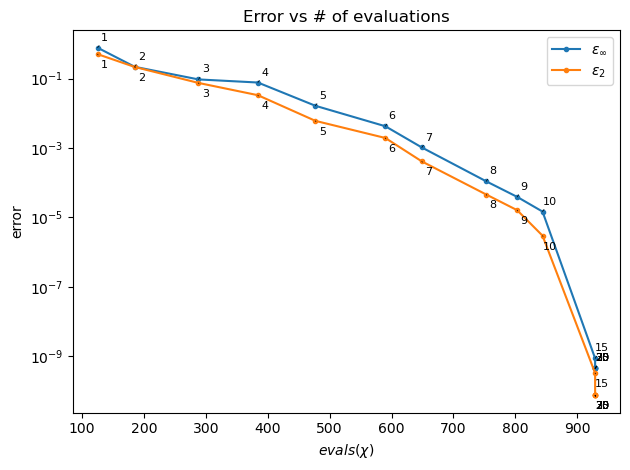

In [96]:
err_max = []
err_2 = []
evals = []

func = TCI.function(lambda *x: C["Cs_abs"].reshape((2,) * n)[*x])

chi_list = [i for i in range(1,10)]
chi_list.extend([i for i in range(10,40,5)])
chi_list.append(70)

for chi in chi_list:
    a = TCI.tensor_cross_errorvschi(func,         # function to be interpolated
                                    C["Cs_abs"],      
                                    L=n,          # number of MPS tensors
                                    eps_or_chi=chi, # bond dimension
                                    iters=2)       # number of back-and-forth sweeps
    err_max.append(a[0])
    err_2.append(a[1])
    evals.append(a[2])

plt.plot(np.array(evals), np.array(err_max), ".-", label = r"$\epsilon_\infty$")
plt.plot(np.array(evals), np.array(err_2), ".-", label = r"$\epsilon_2$")

# Annotate the points with their chi values
for i, chi in enumerate(chi_list):
    # Annotate error_max (first curve)
    plt.annotate(f"{chi}", (evals[i], err_max[i]),
                 textcoords="offset points", xytext=(5, 5), fontsize=8,
                 arrowprops=dict(arrowstyle="-", lw=0.5),
                 ha='center')

    # Annotate error_2 (second curve)
    plt.annotate(f"{chi}", (evals[i], err_2[i]),
                 textcoords="offset points", xytext=(5, -10), fontsize=8,
                 arrowprops=dict(arrowstyle="-", lw=0.5),
                 ha='center')
    

plt.yscale("log")
plt.xlabel(r"$evals(\chi)$")
plt.ylabel(r"error")
plt.legend()
plt.title("Error vs # of evaluations")
plt.tight_layout()
plt.show()

### TCI FOR WHOLE CS

In [97]:
func = TCI.function(lambda *x: Cs.reshape((2,) * n)[*x])

with this previous code we have defined func as $Cs(n \cdot dt) = func(\sigma_1,\sigma_2,..,\sigma_L)$ with $n = \sum_{k=0}^{L-1}  2^k  \sigma_{L-k}$ 

We can prove this definition with the following code:

In [98]:
for i in range(8):
    print(Cs[i])

print()

for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            print(func(0,0,0,0,0,0,0,i,j,k))

#print(func(0,0,0,0,0,0,0,0,1,1))

(0.999999999999997+0j)
(0.9992001652164592-0.03735605132502844j)
(0.9968026425441965-0.07463581455918478j)
(0.9928133701312007-0.11176322424235291j)
(0.987242221973898-0.14866265920668958j)
(0.9801029736820283-0.18525916230762626j)
(0.9714132548281845-0.22147865727827737j)
(0.9611944881572313-0.2572481617845108j)

(0.999999999999997+0j)
(0.9992001652164592-0.03735605132502844j)
(0.9968026425441965-0.07463581455918478j)
(0.9928133701312007-0.11176322424235291j)
(0.987242221973898-0.14866265920668958j)
(0.9801029736820283-0.18525916230762626j)
(0.9714132548281845-0.22147865727827737j)
(0.9611944881572313-0.2572481617845108j)


In [99]:
#print(func(0,1,1,1,1,1,1,1,1,1,1,1))
chi = 5
As, _, eval, err_2, err_max = TCI.tensor_cross_interpolation(func,         # function to be interpolated
                                Cs,      
                                L=n,          # number of MPS tensors
                                eps_or_chi=chi, # bond dimension
                                iters=4)       # number of back-and-forth sweeps

final err_max:  0.000723316756327639
final err_2:  0.0005304183512564337

repeated evaluations:  3298
unique evaluations 379
unique + repeated:  3677
total evaluations:  3677


### Plot of error vs # evals during the whole sweeping back and forth at each tensor update

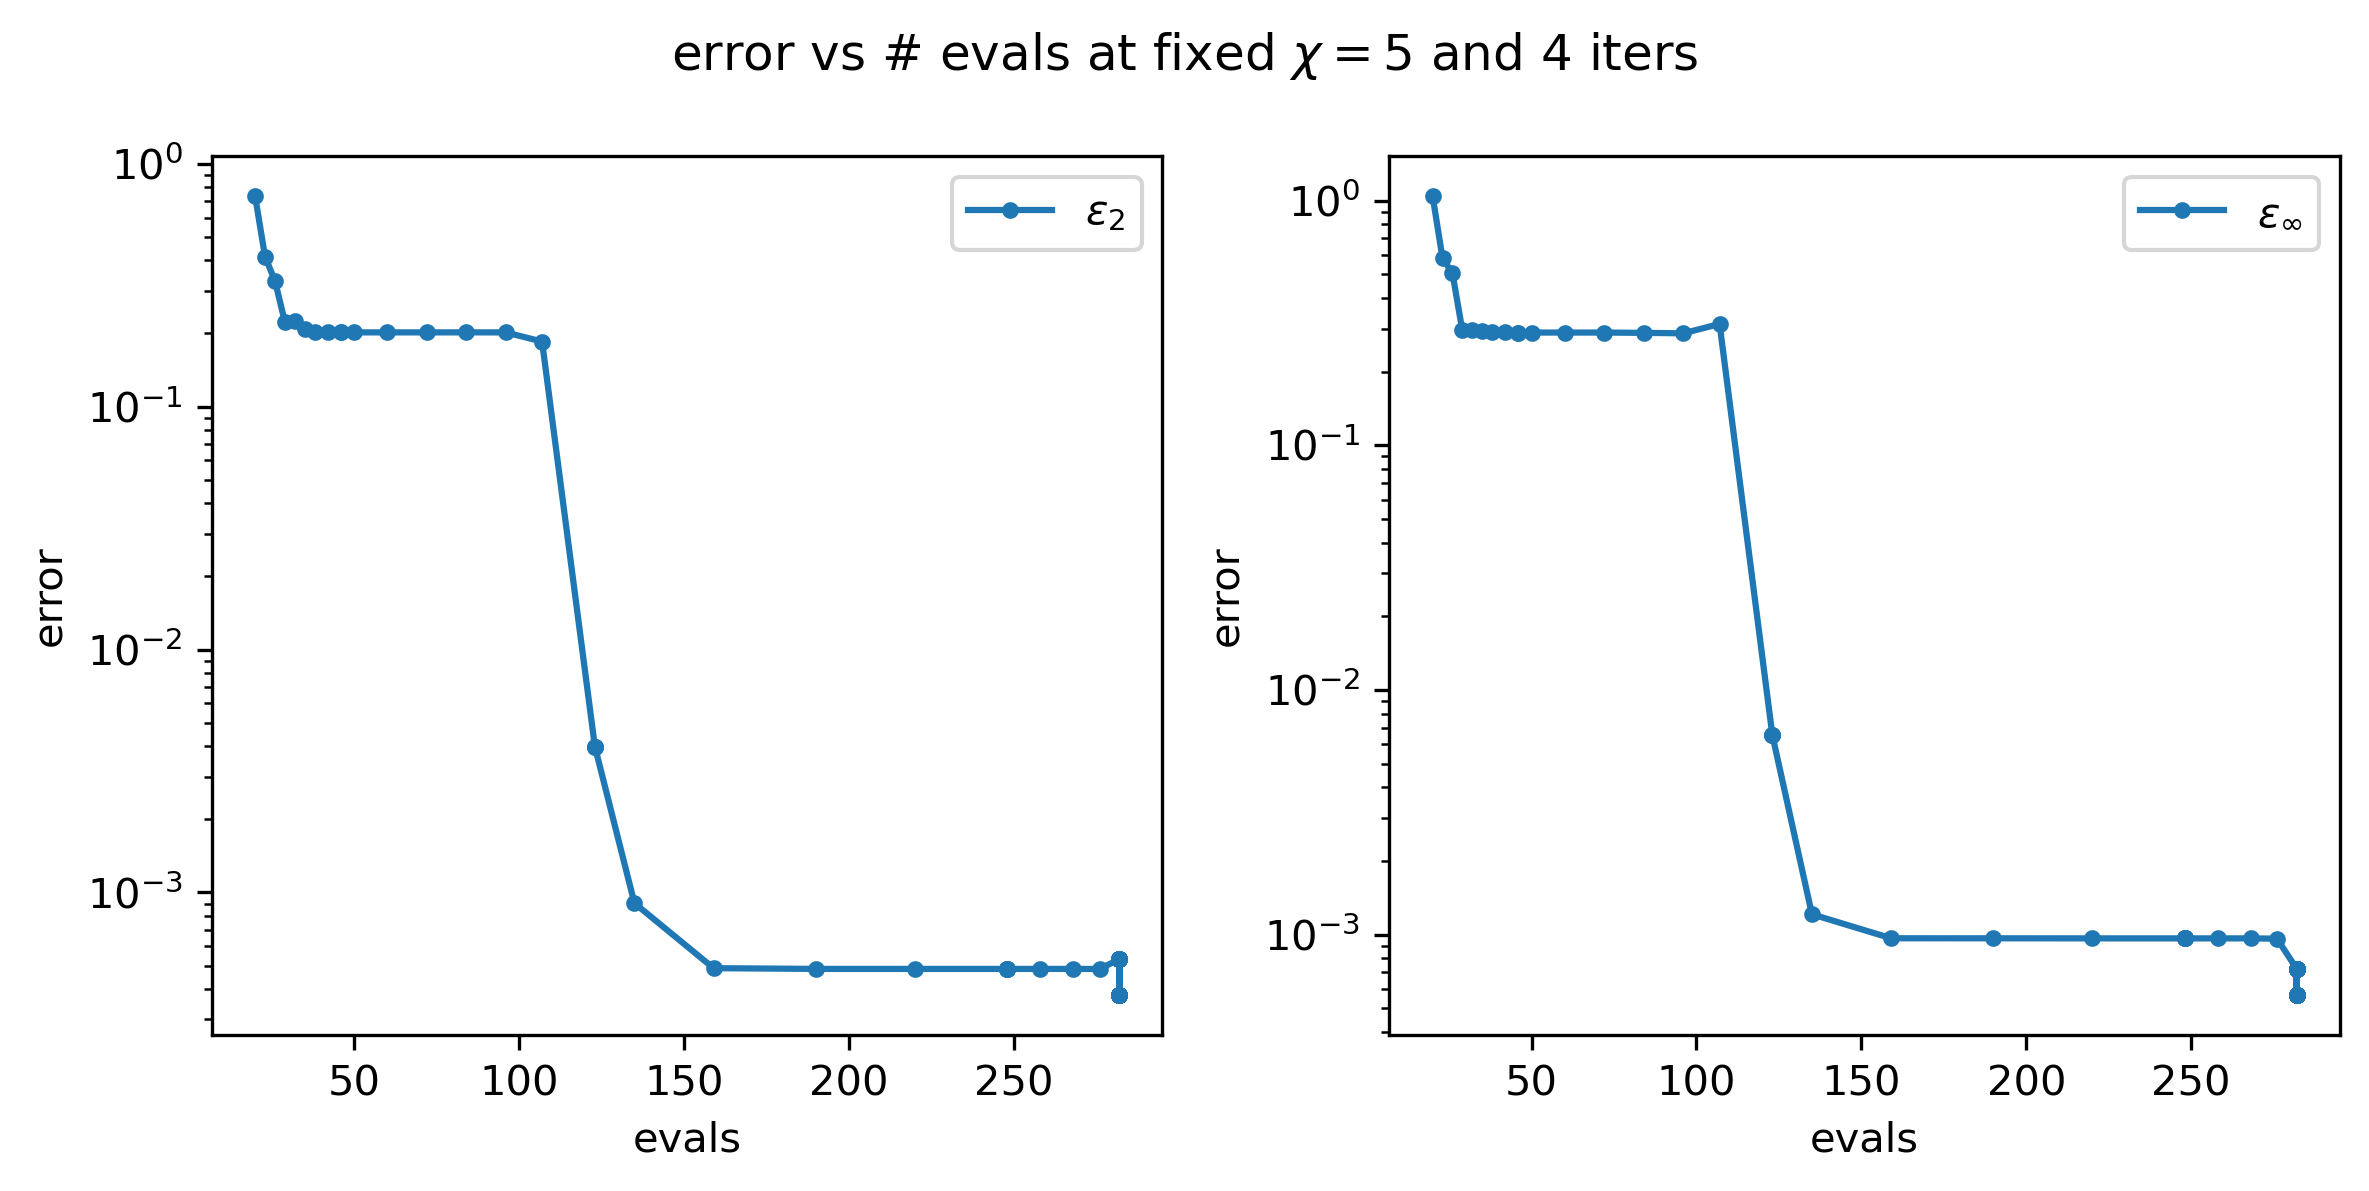

In [81]:
fig, axs = plt.subplots(ncols=2, figsize=(8,4), dpi=300)

axs[0].plot(eval, np.array(err_2), '.-', label = r"$\epsilon_2$")
axs[1].plot(eval, err_max, '.-', label = r"$\epsilon_\infty$")
axs[0].set(xlabel="evals",ylabel="error",
        #xscale="log",
        yscale="log",
        #xlim = (0,200)
        #ylim=(1e-5, 1e0)
        )
axs[1].set(xlabel="evals",
        ylabel="error",
        #xscale="log",
        yscale="log",
        #xlim = (0,200)
        #ylim=(1e-2,1e2)
        )
fig.suptitle(r"error vs # evals at fixed $\chi =$" + f"{chi}" + " and 4 iters")
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

### Plot of interpolated correlation function vs theoretical correlation function

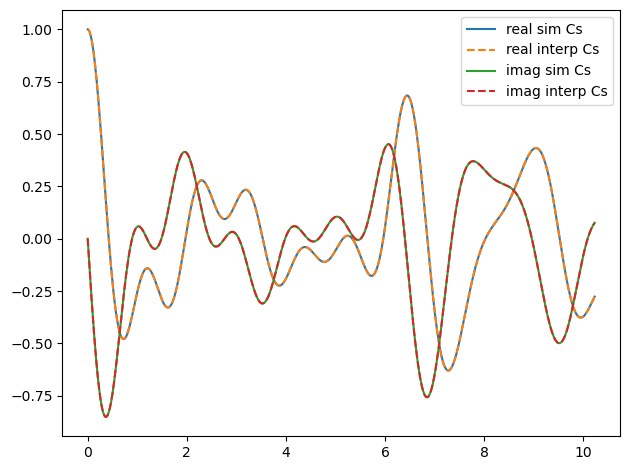

In [82]:
func_interp = TCI.interpolate(As)

ts = np.arange(N)*dt
plt.plot(ts, Cs.real, '-', label = "real sim Cs")
plt.plot(ts, np.real(func_interp), '--', label="real interp Cs")
plt.plot(np.arange(N)*dt, Cs.imag, '-', label = "imag sim Cs")
plt.plot(np.arange(N)*dt, np.imag(func_interp), '--', label="imag interp Cs")
#plt.plot(np.arange(N)*dt, Cs.imag, '-', label = "im sim Cs")
#plt.plot(np.arange(N)*dt, np.imag(func_interp), '--', label="im interp Cs")
plt.legend()
plt.tight_layout()
plt.show()

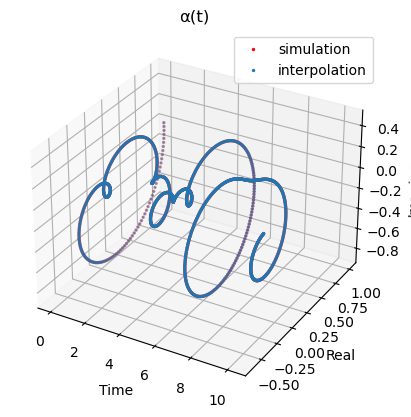

In [58]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ts,np.real(Cs),np.imag(Cs), s = 2, color = "red", label='simulation')
ax.scatter(ts,np.real(func_interp),np.imag(func_interp), s = 2, label = 'interpolation')
ax.set_title('α(t)')
ax.set_xlabel('Time')
ax.set_ylabel('Real')
ax.set_zlabel('Imaginary')
ax.legend()
#plt.show()

## Func_interp2: interpolated function obtained at chi = 4 with error below 10^-2.
Does it interpolate the corr. function perfectly? Answer: yes

In [59]:
import TCI_singlesite_version2 as TCI2
import importlib

importlib.reload(TCI2)

<module 'TCI_singlesite_version2' from '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI/TCI_singlesite_version2.py'>

In [60]:
#print(func(0,1,1,1,1,1,1,1,1,1,1,1))
func = TCI2.function(lambda *x: Cs.reshape((2,) * n)[*x])

As, _, eval, err_2, err_max, func_interp2 = TCI2.tensor_cross_interpolation(func,         # function to be interpolated
                                Cs,      
                                L=n,          # number of MPS tensors
                                eps_or_chi=4, # bond dimension
                                iters=4)       # number of back-and-forth sweeps

In [61]:
print(eval)
print(func_interp2)

[12, 15, 19, 23, 27, 31, 35, 39, 43, 43, 47, 59, 71, 87, 103, 119, 135, 135, 135, 135, 151, 167, 183, 198, 214, 214, 214, 214, 214, 214, 230, 238, 254, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270]
[array([ 1.        -6.93889390e-17j,  0.99920017-3.73560513e-02j,
        0.99680264-7.46358146e-02j, ..., -0.28627842+6.86539409e-02j,
       -0.28146158+7.23740969e-02j, -0.27671569+7.58210980e-02j]), 17]


17


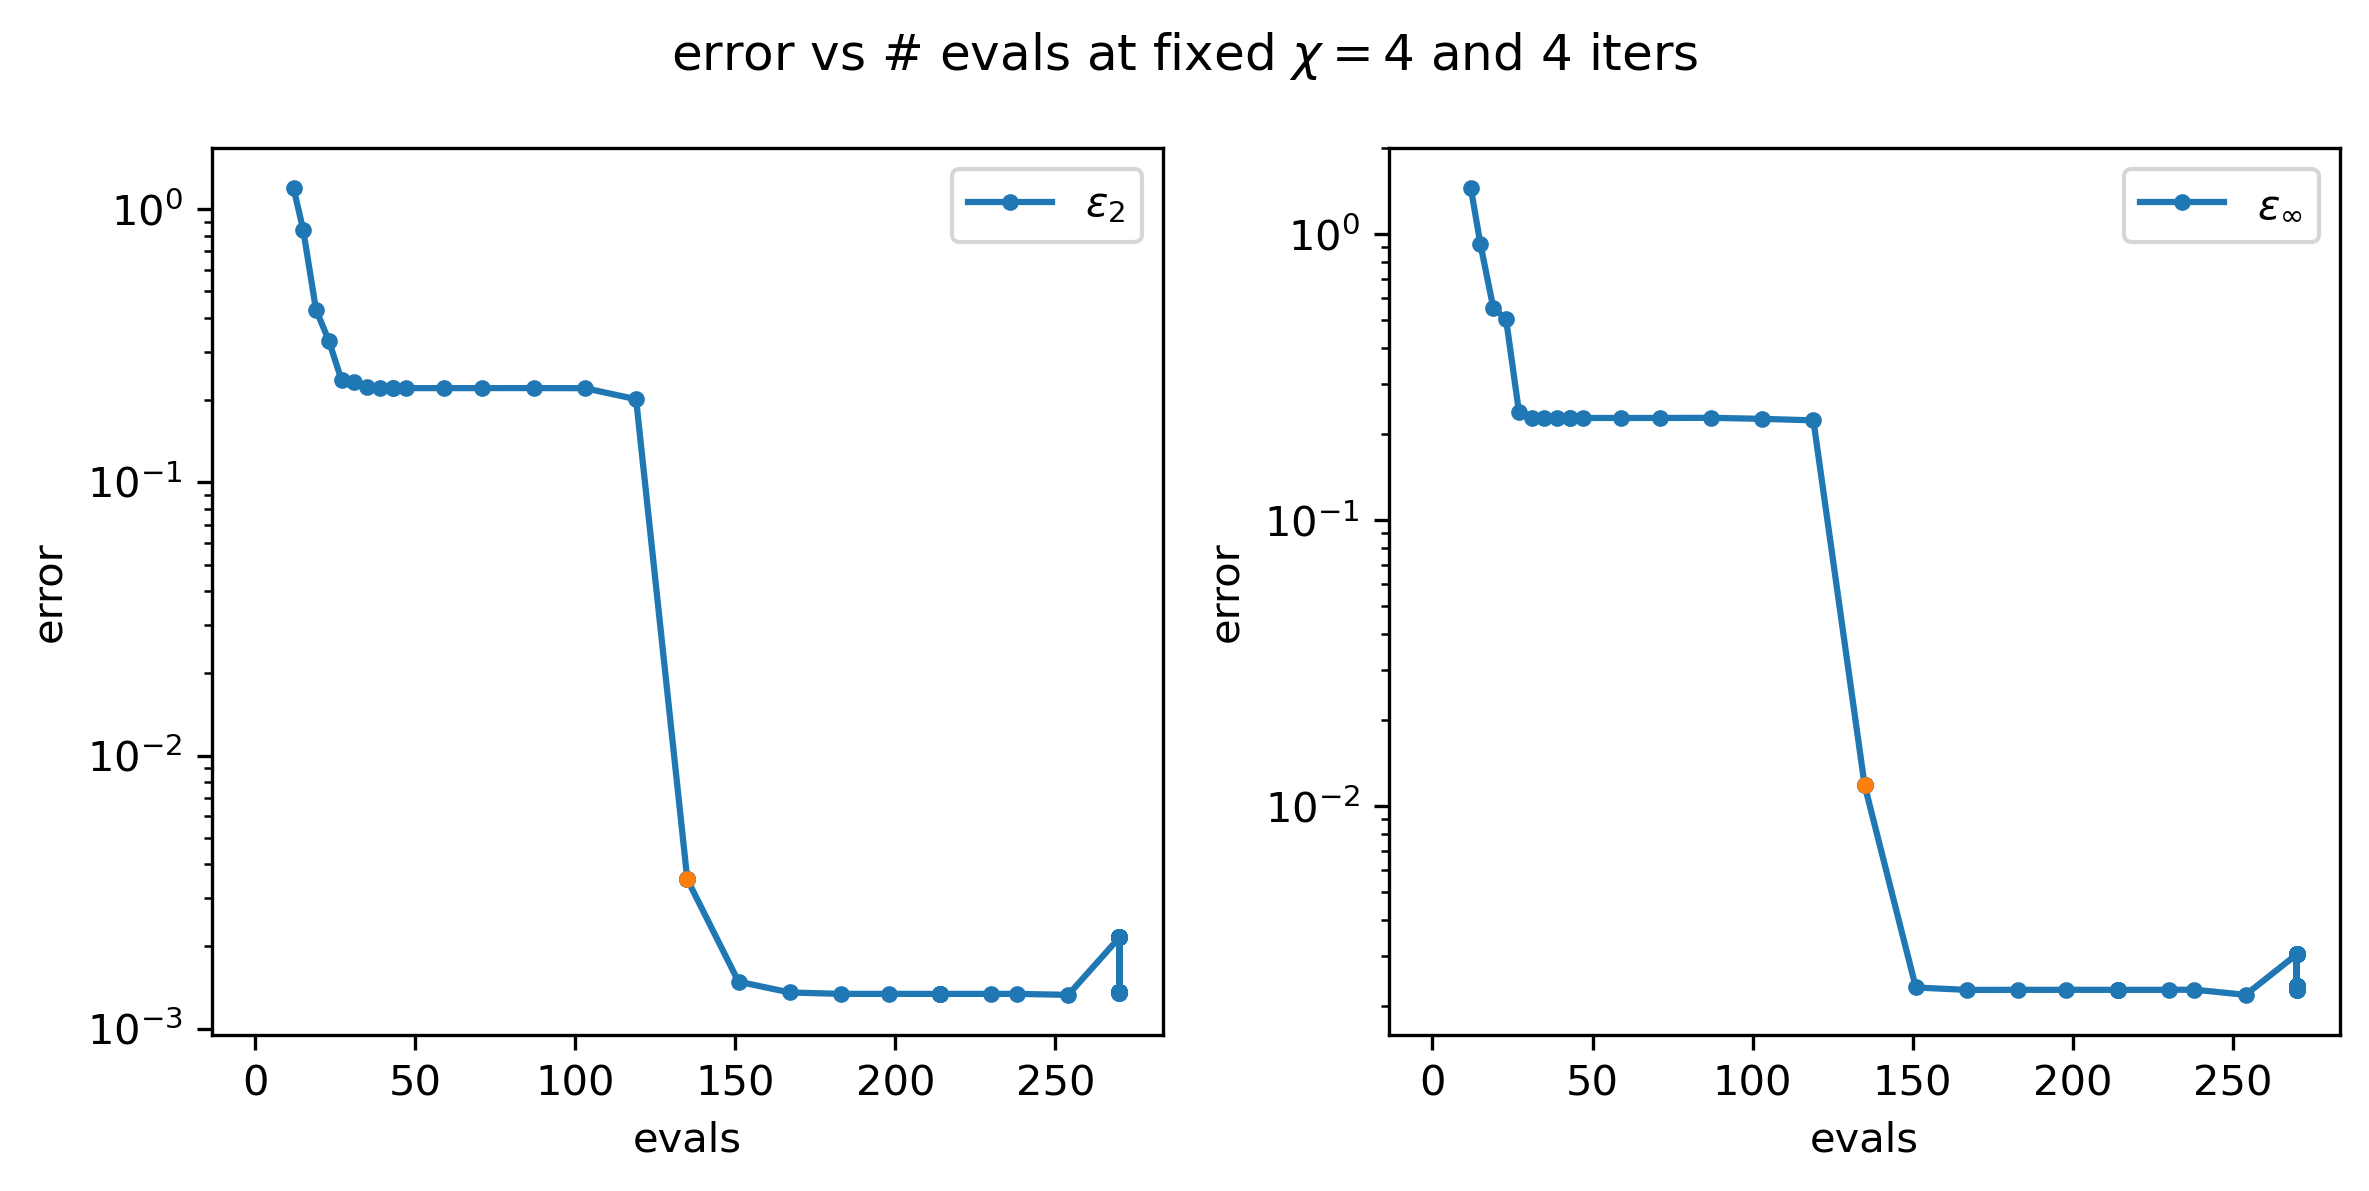

In [62]:
fig, axs = plt.subplots(ncols=2, figsize=(8,4), dpi=300)

index = func_interp2[1]
print(index)
x_target = eval[index]


axs[0].plot(eval, np.array(err_2), '.-', label = r"$\epsilon_2$")
axs[0].plot(x_target, err_2[index], '.', "red")


#index1 = np.abs(np.array(err_2) - target_error).argmin()  # Find the closest match
#x_target1 = eval[index1]  # Corresponding x value
#axs[0].axvline(x = x_target1, color = "green", linestyle = '--')

axs[1].plot(eval, err_max, '.-', label = r"$\epsilon_\infty$")
axs[1].plot(x_target, err_max[index], '.', "red")


#index2 = np.abs(np.array(err_max) - target_error).argmin()  # Find the closest match
#x_target2 = eval[index2]  # Corresponding x value
#axs[1].axvline(x = x_target2, color = "green", linestyle = '--')
#print(index2)

axs[0].set(xlabel="evals",ylabel="error",
        #xscale="log",
        yscale="log",
        #xlim = (0,200)
        #ylim=(1e-5, 1e0)
        )
axs[1].set(xlabel="evals",
        ylabel="error",
        #xscale="log",
        yscale="log",
        #xlim = (0,200)
        #ylim=(1e-2,1e2)
        )
fig.suptitle(r"error vs # evals at fixed $\chi = 4$ and 4 iters")
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

In [63]:
print("err_2 is: ", err_2[index])
print("err_max is: ", err_max[index])
print("# evaluations: ",eval[index])

err_2 is:  0.0035185452531631893
err_max is:  0.01184721081119369
# evaluations:  135


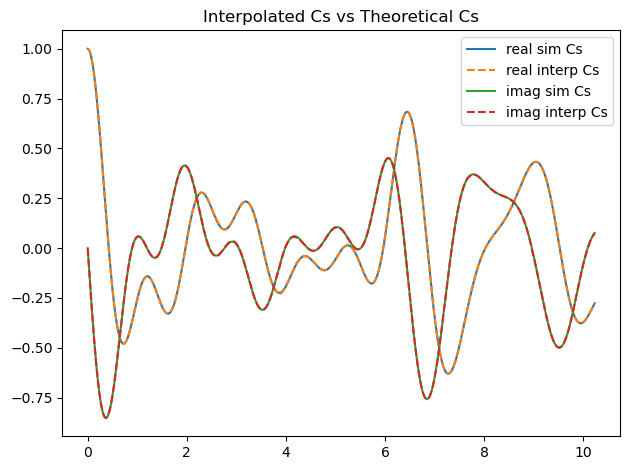

In [64]:
ts = np.arange(N)*dt
plt.plot(ts, Cs.real, '-', label = "real sim Cs")
plt.plot(ts, np.real(func_interp2[0]), '--', label="real interp Cs")
plt.plot(np.arange(N)*dt, Cs.imag, '-', label = "imag sim Cs")
plt.plot(np.arange(N)*dt, np.imag(func_interp2[0]), '--', label="imag interp Cs")
#plt.plot(np.arange(N)*dt, Cs.imag, '-', label = "im sim Cs")
#plt.plot(np.arange(N)*dt, np.imag(func_interp), '--', label="im interp Cs")
plt.title("Interpolated Cs vs Theoretical Cs")
plt.legend()
plt.tight_layout()
plt.show()

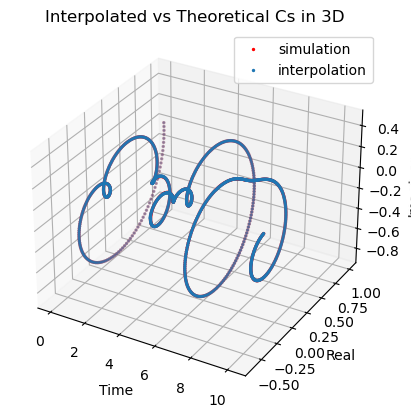

In [65]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ts,np.real(Cs),np.imag(Cs), s = 2, color = "red", label='simulation')
ax.scatter(ts,np.real(func_interp2[0]),np.imag(func_interp2[0]), s = 2, label = 'interpolation')
ax.set_title('Interpolated vs Theoretical Cs in 3D')
ax.set_xlabel('Time')
ax.set_ylabel('Real')
ax.set_zlabel('Imaginary')
ax.legend()
#plt.show()

### Plot of error vs # evaluations($\chi$), for error calculated at the end of the whole algorithm

<>:40: SyntaxWarning: invalid escape sequence '\c'
<>:40: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3630462/86964399.py:40: SyntaxWarning: invalid escape sequence '\c'
  plt.plot([], [], ' ', label="Numbers: $\chi$ values")  # Dummy plot for chi explanation


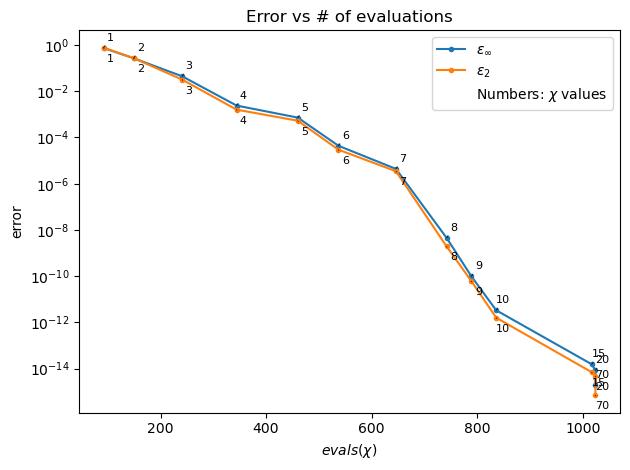

In [66]:
err_max = []
err_2 = []
evals = []
func_interp_list = []

func = TCI.function(lambda *x: Cs.reshape((2,) * n)[*x])

chi_list = [i for i in range(1,10)]
chi_list.extend([i for i in range(10,25,5)])
chi_list.append(70)

for chi in chi_list:
    a = TCI.tensor_cross_errorvschi(func,         # function to be interpolated
                                    Cs,      
                                    L=n,          # number of MPS tensors
                                    eps_or_chi=chi, # bond dimension
                                    iters=4)       # number of back-and-forth sweeps
    err_max.append(a[0])
    err_2.append(a[1])
    evals.append(a[2])
    func_interp_list.append(a[3])

plt.plot(np.array(evals), np.array(err_max), ".-", label = r"$\epsilon_\infty$")
plt.plot(np.array(evals), np.array(err_2), ".-", label = r"$\epsilon_2$")

# Annotate the points with their chi values
for i, chi in enumerate(chi_list):
    # Annotate error_max (first curve)
    plt.annotate(f"{chi}", (evals[i], err_max[i]),
                 textcoords="offset points", xytext=(5, 5), fontsize=8,
                 arrowprops=dict(arrowstyle="-", lw=0.5),
                 ha='center')

    # Annotate error_2 (second curve)
    plt.annotate(f"{chi}", (evals[i], err_2[i]),
                 textcoords="offset points", xytext=(5, -10), fontsize=8,
                 arrowprops=dict(arrowstyle="-", lw=0.5),
                 ha='center')
    
plt.plot([], [], ' ', label="Numbers: $\chi$ values")  # Dummy plot for chi explanation

plt.yscale("log")
plt.xlabel(r"$evals(\chi)$")
plt.ylabel(r"error")
plt.legend()
plt.title("Error vs # of evaluations")
plt.tight_layout()
plt.show()

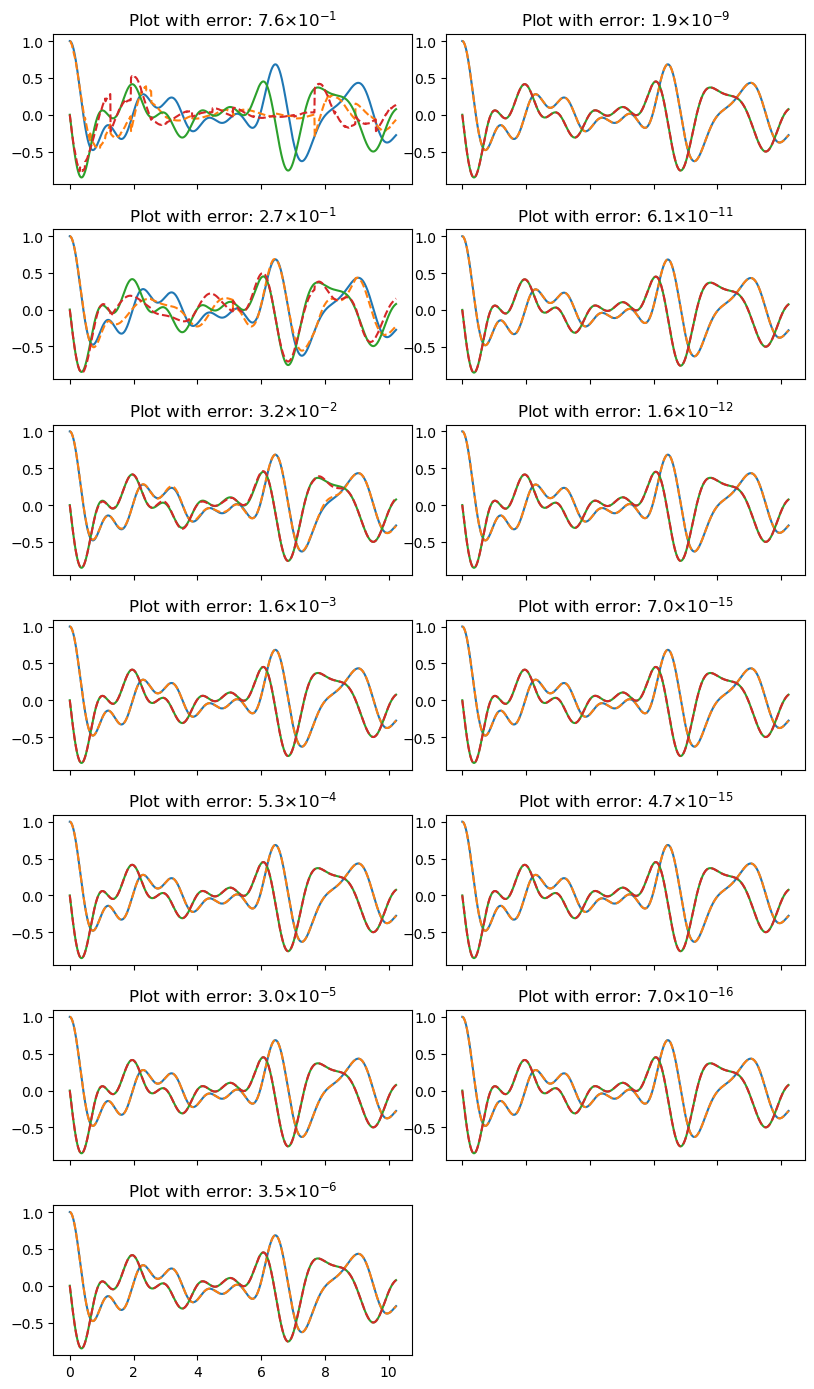

In [67]:
# Determine the number of rows and columns
n_plots = len(func_interp_list)
ncols = 2
nrows = (n_plots + 1) // 2  # Ensure enough rows for all plots

# Create subplots with a grid layout
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 2 * nrows), sharex=True)

# Flatten `axs` for easier indexing (handles both 2D and 1D cases)
axs = np.array(axs).T.flatten()

for i,element in enumerate(func_interp_list):
    axs[i].plot(ts, Cs.real, '-')
    axs[i].plot(ts, np.real(element), '--')
    axs[i].plot(ts, Cs.imag, '-')
    axs[i].plot(ts, np.imag(element), '--')
    exponent = int(np.floor(np.log10(err_2[i])))  # Get the exponent
    mantissa = err_2[i] / (10 ** exponent)  # Get the mantissa
    #axs[i].set_title(f"Plot with error: {err_2[i]:.2e}")
    axs[i].set_title(f"Plot with error: {mantissa:.1f}×10$^{{{exponent}}}$")

for j in range(len(func_interp_list), len(axs)):
    fig.delaxes(axs[j])  # Remove empty subplot

fig.tight_layout()

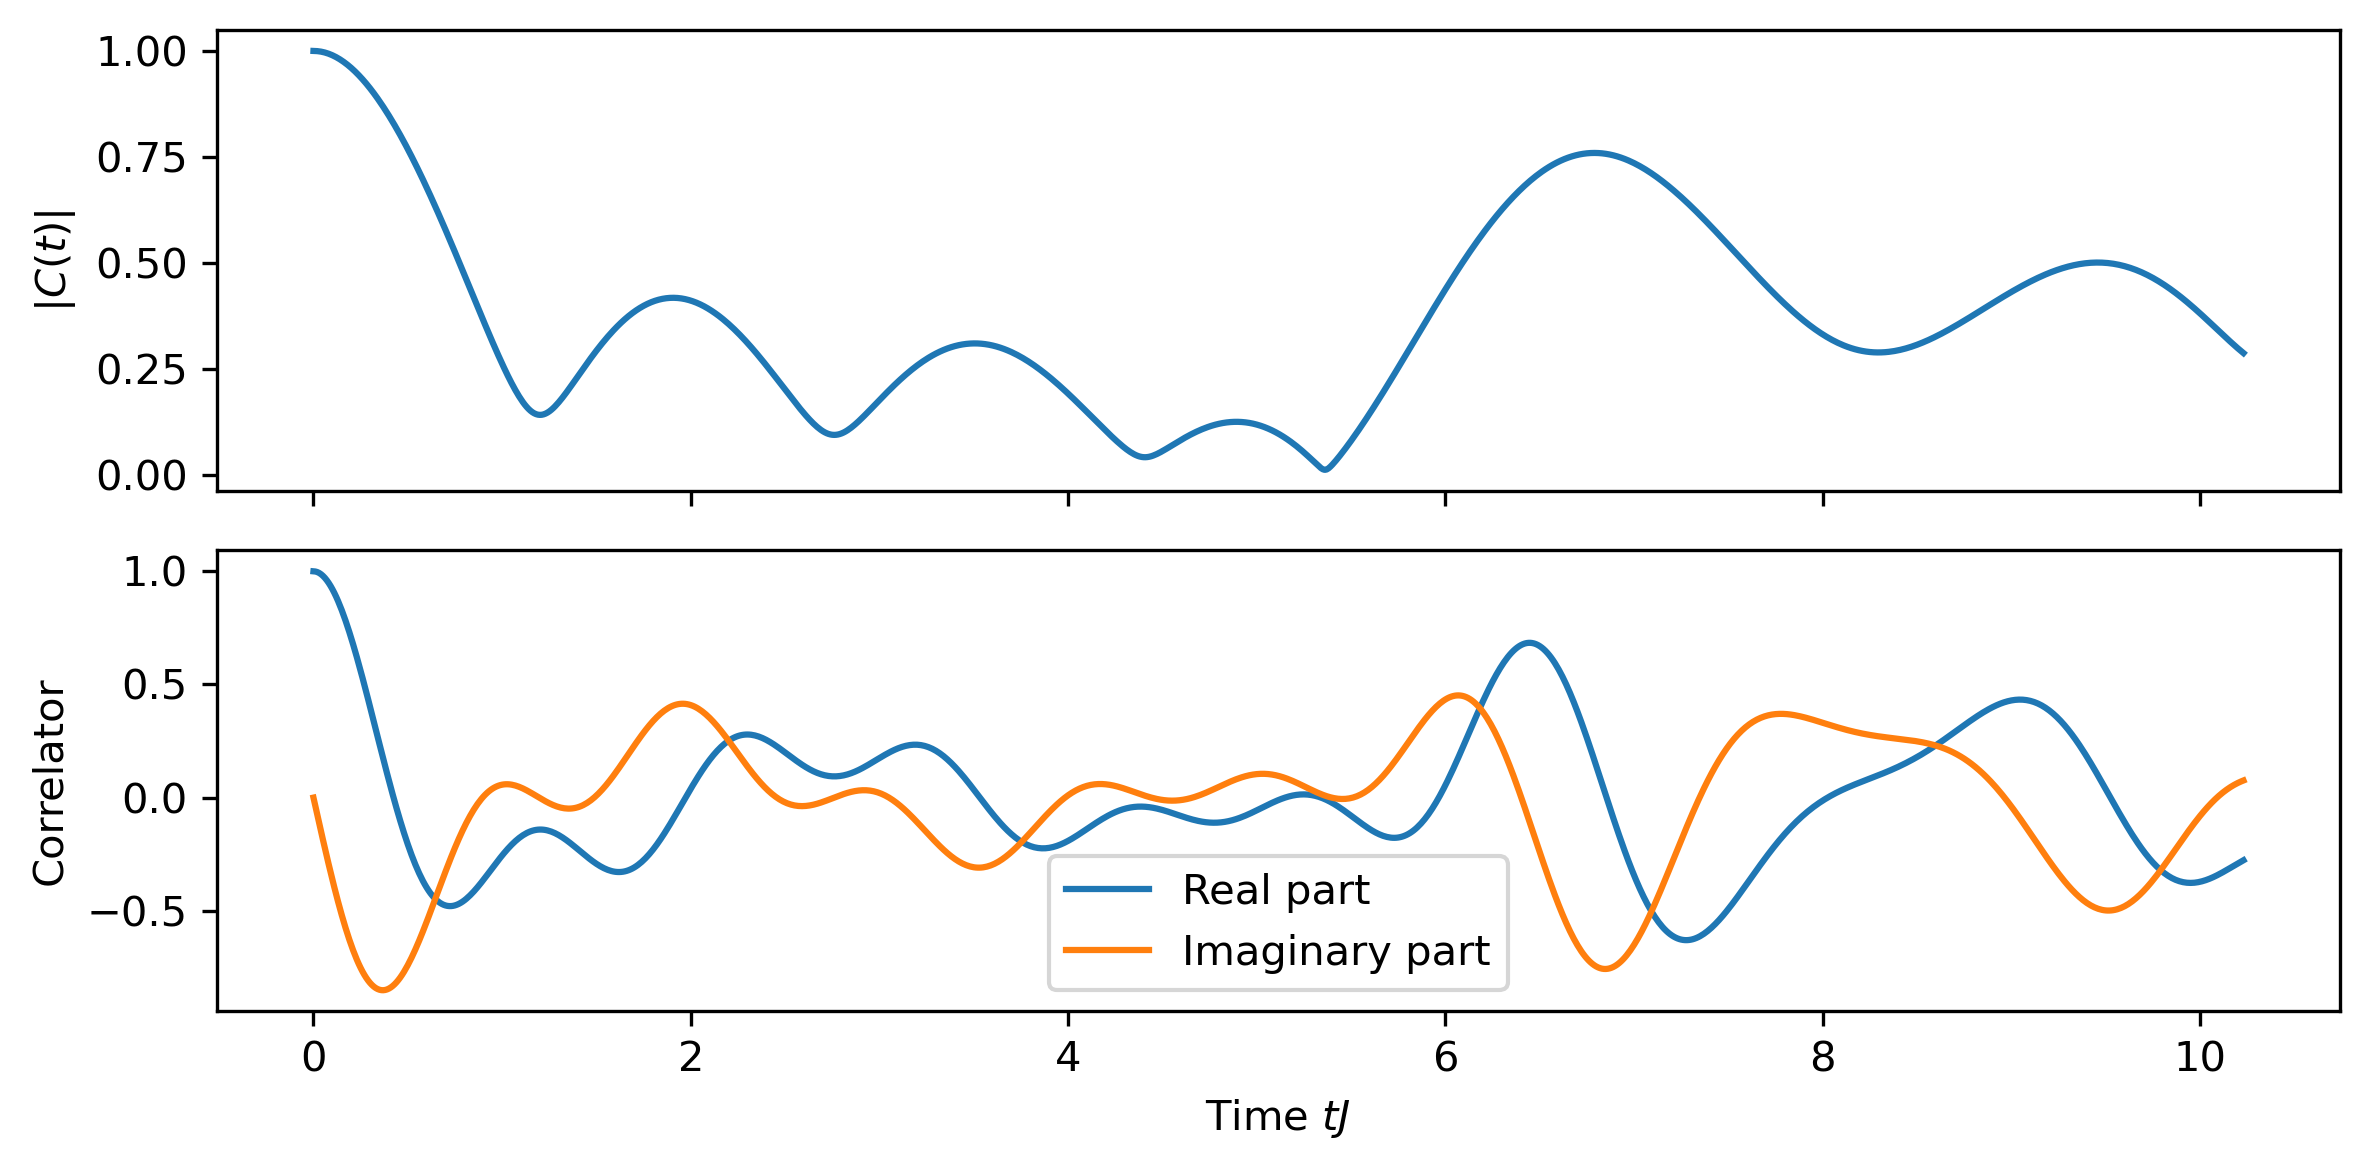

In [68]:
# plot real, imaginary part and absolute value
fig, axs = plt.subplots(nrows=2, dpi=300, figsize=(8,4), sharex=True)

axs[0].plot(np.arange(N)*dt, np.abs(Cs))
axs[0].set(ylabel=r'$|C(t)|$')
axs[1].plot(np.arange(N)*dt, Cs.real, label='Real part')
axs[1].plot(np.arange(N)*dt, Cs.imag, label='Imaginary part')
axs[1].set(xlabel=r'Time $tJ$',
           ylabel=r'Correlator')
axs[1].legend()

plt.tight_layout()
plt.show()

In [69]:
# Fourier transform the time-domain with windowing function cos(pi/2 * t/T)**nw
def timeFT(Ct, t_list, nw=4):
    """
    full complex data as input. 
    data only for positive time.
    """
    
    n = len(t_list)
    Wfunlist = [np.cos(np.pi*t_list[t]/(2*t_list[-1]))**nw  for t in range(n)]
    
    input_list = Wfunlist[:] * (np.array(Ct[:]))
    FTresult = np.fft.fft(input_list)
    
    freq = 2 * np.pi * np.fft.fftfreq(n, t_list[1]-t_list[0])
    freq = np.fft.fftshift(freq)
    FTresult = np.fft.fftshift(FTresult)
    
    return freq, FTresult

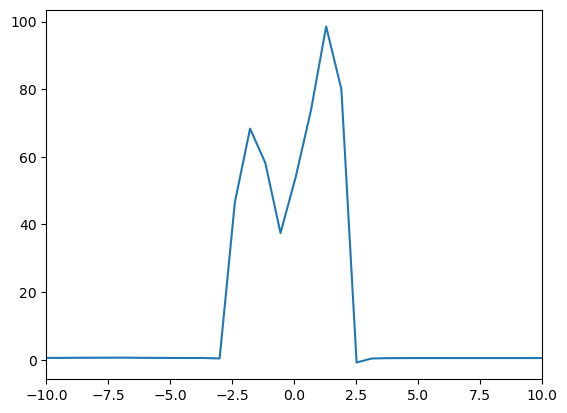

In [70]:
freq, FTresult = timeFT(Ct=Cs, t_list=np.arange(N)*dt, nw=3)
plt.plot(freq-E0+E1, np.real(FTresult))
plt.xlim(-10,10)
plt.show()